In [157]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
games = pd.read_csv("Tottanham_games.csv")
games.head()

,Game date,Win,Loss,Draw,Points,Tottenham,FTSE
0,1/31/2004,0,1,0,0,-0.0027,-0.0021
1,2/7/2004,1,0,0,3,0.0000,0.0072
2,2/11/2004,1,0,0,3,0.1189,-0.0042
3,2/22/2004,0,0,1,1,0.0000,0.0021
4,3/9/2004,0,1,0,0,0.0000,0.0007


In [40]:
rf = 4.57               # 20-year risk-free rate (%)
equity_beta = 1.29      # Tottanham equity beta
tax_rate = 35           # company tax rate (%)
team_eval = pd.read_csv("team_eval.csv")
team_eval

,Team,Avg. Net Goals (1998-2007),Avg. Points (1998-2007),Operating Income,Revenue,Net Debt/EV,Enterprise Value (EV)a
0,Manchester United,42.7,82,50,169,0.84,934
1,Arsenal,38.1,77,11,134,0.53,588
2,Chelsea,33.9,74,-20,154,0.28,345
3,Liverpool,24.6,67,20,123,0.18,291
4,Newcastle United,2.3,53,6,87,0.46,167
5,Tottenham Hotspur,-1.9,51,5,75,0.12,156
6,Everton,-4.9,49,-8,58,0.32,106
7,Aston Villa,0.0,51,-11,50,0.16,90


In [4]:

# tottanham balance sheet (millions of pounds)

balance_sheet = pd.read_csv("balance_sheet.csv", header=None )
balance_sheet.head()

,0,1,2,3
0,Assets,Current assets,Cash and equivalents,26.29
1,Assets,Current assets,"Investments, available for sale",0.63
2,Assets,Current assets,Inventory - Merchandise,1.17
3,Assets,Current assets,Accounts Receivable,19.99
4,Assets,Current assets,Total current assets,48.07


A part

B part

C part

 slope: 0.6752185753189055


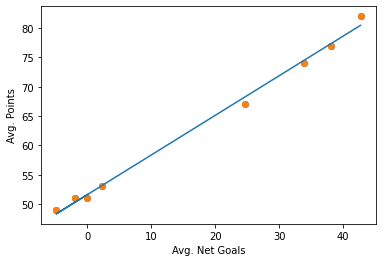

In [56]:
x = team_eval['Avg. Net Goals (1998-2007)']
y = team_eval['Avg. Points (1998-2007)']
plt.scatter(x, y)
mod = sm.OLS(y, sm.add_constant(x))
fitted = mod.fit()

plt.scatter(x, y)
intercept, slope = fitted.params 
plt.plot(x, x*slope + intercept)
plt.ylabel('Avg. Points')
plt.xlabel('Avg. Net Goals')
print(f' slope: {slope}')

In [161]:
def get_expected_revenue(base, growth_rates, without_stadium=True):
    result = [base]
    if without_stadium:
        growth_rates = 1 + ((growth_rates - 1) / 4)
    for g in growth_rates:
        result.append(result[-1]*g)
    return result

In [162]:
#incomes
df = pd.DataFrame({'year': [year for year in range(2007, 2018)]})
expected_growth = 12* 0.8 + 0 * 0*2
avg_net_goals = float(team_eval[team_eval['Team']=='Tottenham Hotspur']['Avg. Net Goals (1998-2007)'])
df['expected_net_goals'] = np.array([avg_net_goals + i*expected_growth for i in range(0,11)])
df['expected_avg_points'] = fitted.predict(sm.add_constant(df['expected_net_goals'][1:]))
df['expected_avg_points'][0] = 51
df['expected_growth_of_points'] = df['expected_avg_points']/df['expected_avg_points'].shift(1) 
df['expected_growth_of_points'][0] = 1 
df['expected_growth_of_points'] = (df['expected_growth_of_points'] - 1) * 100
df['expected_growth_in_revenue'] = df['expected_growth_of_points']*1.0152 /100 + 1
df['expected_revenue'] = get_expected_revenue(75, df['expected_growth_in_revenue'][1:])
df['expected_revenue'][0] = 75
df

/tmp/ipykernel_1710963/210071333.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['expected_avg_points'][0] = 51
/tmp/ipykernel_1710963/210071333.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['expected_growth_of_points'][0] = 1
/tmp/ipykernel_1710963/210071333.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['expected_revenue'][0] = 75


,year,expected_net_goals,expected_avg_points,expected_growth_of_points,expected_growth_in_revenue,expected_revenue
0,2007,-1.9,51.000000,0.000000,1.000000,75.000000
1,2008,7.7,56.821750,11.415196,1.115887,77.172883
2,2009,17.3,63.303848,11.407777,1.115812,79.407264
3,2010,26.9,69.785947,10.239659,1.103953,81.470920
4,2011,36.5,76.268045,9.288544,1.094297,83.391542
5,2012,46.1,82.750143,8.499101,1.086283,85.190358
6,2013,55.7,89.232242,7.833338,1.079524,86.884028
7,2014,65.3,95.714340,7.264301,1.073747,88.485891
8,2015,74.9,102.196438,6.772338,1.068753,90.006804
9,2016,84.5,108.678537,6.342783,1.064392,91.455732


In [163]:
#Expenses
e_0 = 20000000
e = [50000 * 52 * (1.1)**i for i in range(10)]

D part